In [1]:
from mmpose.apis import (inference_bottom_up_pose_model, init_pose_model,
                         vis_pose_result)
from mmcv import Config
from mmpose.datasets import build_dataloader, build_dataset
from mmpose.datasets import DatasetInfo
from matplotlib import pyplot as plt
import os
import cv2

In [2]:
from mmpose.apis import (inference_bottom_up_pose_model, init_pose_model,
                         vis_pose_result)
# from mmpose.datasets import build_dataloader, build_dataset
from mmpose.models import build_posenet

In [3]:
checkpoint = '/mnt/ssd/marley/ID_Card/mmpose/work_dirs/baseline_2_higherhrnet/latest.pth'
config_file = '/mnt/ssd/marley/ID_Card/mmpose/configs/ID_card/baseline_2_higherhrnet_w32_IDCard_512x512.py'
cfg = Config.fromfile(config_file)

In [4]:
model = init_pose_model(cfg, checkpoint)
dataset_info = model.cfg.data['test'].get('dataset_info', None)
dataset_info = DatasetInfo(dataset_info)

Use load_from_local loader


In [5]:
images = [os.path.join('/mnt/ssd/marley/ID_Card/ID_card_data/val',img) for img in os.listdir('/mnt/ssd/marley/ID_Card/ID_card_data/val') if img.endswith('.jpg')]
dataset = build_dataset(cfg.data.test, dict(test_mode=True))

loading annotations into memory...
Done (t=0.04s)
=> num_images: 3400


/mnt/ssd/marley/ID_Card/open-mmlab/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/mnt/ssd/marley/ID_Card/open-mmlab/lib/python3.6/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


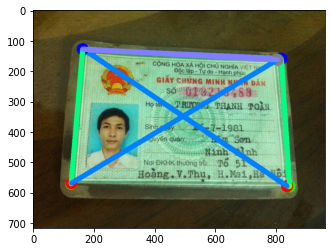

In [7]:
img = '/mnt/ssd/marley/ID_Card/ID_card_data/test/test_653.jpg'
keypoint_results, returned_outputs = inference_bottom_up_pose_model(model, img, 'BottomUpIDCardDataset', dataset_info, return_heatmap=True)
# for result in keypoint_results:
#     result['keypoints'][:,0] = result['keypoints'][:,0]/0.23958820776789894
#     result['keypoints'][:,1] = result['keypoints'][:,1]/0.27871529667936856
vis_result = vis_pose_result(model,
                             img,
                             keypoint_results,
                             radius=20,
                             thickness=15,
                             dataset=model.cfg.data.test.type,
                             show=False)
vis_result = cv2.cvtColor(vis_result, cv2.COLOR_BGR2RGB)
plt.imshow(vis_result)

In [9]:
# from skimage import exposure
# img = cv2.resize(vis_result, (640, 512))
# for slice in heatmap:
#     map_img = exposure.rescale_intensity(slice, out_range=(0, 255))
#     map_img = np.uint8(map_img) 
#     heatmap_img = cv2.applyColorMap(map_img, cv2.COLORMAP_JET)
#     img = cv2.addWeighted(heatmap_img, 0.3, img, 0.8, 0)

In [10]:
# fin = cv2.addWeighted(heatmap_img, 0.5, img, 0.5, 0)
# plt.imshow(fin)

In [ ]:
fin.shape

(512, 640, 3)

In [ ]:
dataset

In [ ]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/mnt/ssd/marley/ID_Card/mmpose/inference_result/test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
h, w

(3283, 3481)

In [ ]:
img_id = dataset.name2id['passport_936.jpg']
coco = dataset.coco
ann_ids = coco.getAnnIds(imgIds=img_id)
anno = coco.loadAnns(ann_ids)
joint = dataset._get_joints(anno)

In [ ]:
def _draw_target(img, joints):
    """Draw target joints"""
    img_copy = img
    colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [128, 128, 128]]
    for i in range(joints.shape[0]): # Num card in image
        for j in range(joints.shape[1]): # Num keypoints
            x = int(joints[i, j, 0]* (w/512.0)) 
            y = int(joints[i, j, 1]* (h/512.0)) 
            print(x,y)
            img_copy = cv2.circle(img_copy, (x, y),
                                        radius=4, color=colors[j], thickness=5)
    return img_copy

In [ ]:
img = _draw_target(img, joint)

1997 1960
2009 2953
2708 2967
2726 1988
1108 1609
899 1734
1077 2031
1287 1905
785 2915
1006 3202
1448 2860
1226 2575
1574 352
1562 640
1994 650
1995 374
295 693
295 1553
1490 1553
1490 693


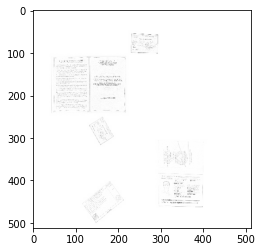

In [ ]:
plt.imshow(img)